# Easi, EG35, raw proteins

Sample description:
- Diagnosis: Aplastic anemia
- BM blasts: 1%

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import anndata as ad
import scvi
import scanpy as sc
import umap

from ridgeplot import ridgeplot

import warnings

warnings.filterwarnings('ignore')

Global seed set to 0
/Users/tiinatuononen/opt/anaconda3/envs/tiina-env/lib/python3.10/site-packages/pytorch_lightning/utilities/warnings.py:53: LightningDeprecationWarning: pytorch_lightning.utilities.warnings.rank_zero_deprecation has been deprecated in v1.6 and will be removed in v1.8. Use the equivalent function from the pytorch_lightning.utilities.rank_zero module instead.
  new_rank_zero_deprecation(
/Users/tiinatuononen/opt/anaconda3/envs/tiina-env/lib/python3.10/site-packages/pytorch_lightning/utilities/warnings.py:58: LightningDeprecationWarning: The `pytorch_lightning.loggers.base.rank_zero_experiment` is deprecated in v1.7 and will be removed in v1.9. Please use `pytorch_lightning.loggers.logger.rank_zero_experiment` instead.
  return new_rank_zero_deprecation(*args, **kwargs)


In [2]:
#raw protein data, all datasets

adata = sc.read_h5ad('/Users/tiinatuononen/Desktop/Thesis/Project/data/healthy_malig_!m.h5ad')


In [3]:
adata.obs['batch_group'] 

GTAGTACCAATCCTTT-1-s4d1    Neurips
CTCAAGAGTCACAGAG-1-s4d1    Neurips
CTGTGGGTCATGCGGC-1-s4d1    Neurips
CGTGATAGTTATCTGG-1-s4d1    Neurips
AGATCCAAGATCGGTG-1-s4d1    Neurips
                            ...   
TTTGTCAGTCATGCAT-1-17        Caron
TTTGTCAGTGCTTCTC-1-17        Caron
TTTGTCAGTGGACGAT-1-17        Caron
TTTGTCATCAACGAAA-1-17        Caron
TTTGTCATCTAACTGG-1-17        Caron
Name: batch_group, Length: 298991, dtype: category
Categories (5, object): ['Caron', 'Easi', 'Granja', 'Neurips', 'Seurat']

In [4]:
adata_easi=adata[adata.obs['batch_group'] == 'Easi' ]

adata_easi

View of AnnData object with n_obs × n_vars = 121340 × 8051
    obs: 'cell_type', 'n_genes', 'percent_mito', 'percent_ribo', 'n_counts', 'leiden_r2', 'leiden_r2_n_genes_MAD_diff', 'leiden_r2_n_counts_MAD_diff', 'leiden_r2_percent_mito_MAD_diff', 'filter', 'model_group', 'BATCH', 'POOL', 'SAMPLE_SET', 'SAMPLE_TYPE', 'SAMPLE_TISSUE', 'DIAGNOSIS', 'SUBTYPE', 'STATUS', 'eg_code', 'leiden_r1', 'new_cell_type', 'batch_group'
    uns: 'neighbors', 'new_cell_type_colors', 'umap'
    obsm: 'X_pca', 'X_totalVI', 'X_umap', 'protein_expression'
    obsp: 'connectivities', 'distances'

In [5]:
adata_easi.obs['POOL'].unique().tolist()

['EG35',
 'EG38',
 'EG58',
 'EG39',
 'EG4',
 'EG48',
 'EG23',
 'EG36',
 'EG61',
 'EG3',
 'EG12',
 'EG46',
 'EG9',
 'EG43',
 'EG56',
 'EG42',
 'EG49',
 'EG37',
 'EG57',
 'EG24',
 'EG11',
 'EG14',
 'EG55',
 'EG28',
 'EG52',
 'EG33',
 'EG10',
 'EG32',
 'EG59',
 'EG16',
 'EG63',
 'EG15',
 'EG21',
 'EG26',
 'EG13',
 'EG53',
 'EG51',
 'EG2',
 'EG40',
 'EG62',
 'EG31',
 'EG7',
 'EG8',
 'EG29',
 'EG41',
 'EG47',
 'EG1',
 'EG6',
 'EG34',
 'EG30',
 'EG60',
 'EG44',
 'EG27',
 'EG22',
 'EG54',
 'EG45',
 'EG5',
 'EG50',
 'EG25']

In [6]:
adata_easi.obs['new_cell_type'].unique().tolist()

['NK',
 'non-leukemic',
 'preleukemic',
 'non-leukemic?',
 nan,
 'leukemic',
 'leukemic?',
 'doublets?',
 'unknown',
 '0',
 'preleukemic?']

In [7]:
#select sample from Easigenomics dataset

adata_sample=adata_easi[adata_easi.obs['POOL'] == 'EG35']

In [8]:
adata_sample.copy()

AnnData object with n_obs × n_vars = 2188 × 8051
    obs: 'cell_type', 'n_genes', 'percent_mito', 'percent_ribo', 'n_counts', 'leiden_r2', 'leiden_r2_n_genes_MAD_diff', 'leiden_r2_n_counts_MAD_diff', 'leiden_r2_percent_mito_MAD_diff', 'filter', 'model_group', 'BATCH', 'POOL', 'SAMPLE_SET', 'SAMPLE_TYPE', 'SAMPLE_TISSUE', 'DIAGNOSIS', 'SUBTYPE', 'STATUS', 'eg_code', 'leiden_r1', 'new_cell_type', 'batch_group'
    uns: 'neighbors', 'new_cell_type_colors', 'umap'
    obsm: 'X_pca', 'X_totalVI', 'X_umap', 'protein_expression'
    obsp: 'connectivities', 'distances'

In [9]:
adata_sample.obs['new_cell_type'].unique().tolist()

['NK', 'non-leukemic']

In [10]:
adata_sample.obs['POOL'].unique().tolist()

['EG35']

In [11]:
#Select only NK- and T-cells (based on new_cell_type annotations)

adata_nk=adata_sample[adata_sample.obs['new_cell_type'] == 'NK' ]

In [12]:
adata_nk.copy()

AnnData object with n_obs × n_vars = 1226 × 8051
    obs: 'cell_type', 'n_genes', 'percent_mito', 'percent_ribo', 'n_counts', 'leiden_r2', 'leiden_r2_n_genes_MAD_diff', 'leiden_r2_n_counts_MAD_diff', 'leiden_r2_percent_mito_MAD_diff', 'filter', 'model_group', 'BATCH', 'POOL', 'SAMPLE_SET', 'SAMPLE_TYPE', 'SAMPLE_TISSUE', 'DIAGNOSIS', 'SUBTYPE', 'STATUS', 'eg_code', 'leiden_r1', 'new_cell_type', 'batch_group'
    uns: 'neighbors', 'new_cell_type_colors', 'umap'
    obsm: 'X_pca', 'X_totalVI', 'X_umap', 'protein_expression'
    obsp: 'connectivities', 'distances'

In [13]:
adata_nk.obs['cell_type']

AAACCTGAGCCCTAAT-1-100    NKT
AAACCTGCAGACGCTC-1-100    NKT
AAACCTGTCCTTAATC-1-100    NKT
AAACGGGGTCTCTCGT-1-100    NKT
AAAGATGTCCAGTAGT-1-100    NKT
                         ... 
TTTGCGCTCATGTAGC-1-100    NKT
TTTGGTTCACGCATCG-1-100    NKT
TTTGGTTTCCGAAGAG-1-100    NKT
TTTGTCAAGAATTGTG-1-100    NKT
TTTGTCACATTCACTT-1-100    NKT
Name: cell_type, Length: 1226, dtype: category
Categories (1, object): ['NKT']

In [14]:
#surface protein expression of NK- and T-cells
nk_prot=adata_nk.obsm['protein_expression']

In [15]:
#surface protein expression of whole sample
prot=adata_sample.obsm['protein_expression']

In [16]:
#NK- and T-cells in sample
nk_prot.shape

(1226, 141)

In [17]:
#All cells in sample

prot.shape

(2188, 141)

In [18]:
#To exclude columns that contain only zeros, all cell types included

prot = pd.DataFrame(prot)
prot != 0
(prot != 0).any(axis=0)
prot.loc[:, (prot != 0).any(axis=0)]
prot = prot.loc[:, (prot != 0).any(axis=0)]

for col in prot:
    print(col)

CD3
CD8
CD56
CD19
CD33
CD11c
CD45RA
CD123
CD7
CD4
CD44
CD14
CD45RO
CD20
CD5
HLA-DR
CD11b
CD64
CD58
CD24
CD13
CD2
CD81
CD38
CD127
CD45
CD73
CD197
CD34
CD10
CD15
CD117
CD66ace


In [19]:
#To exclude columns that contain only zeros from NK-only file

nk_prot = pd.DataFrame(nk_prot)
nk_prot != 0
(nk_prot != 0).any(axis=0)
nk_prot.loc[:, (nk_prot != 0).any(axis=0)]
nk_prot = nk_prot.loc[:, (nk_prot != 0).any(axis=0)]

for col in nk_prot:
    print(col)

CD3
CD8
CD56
CD19
CD33
CD11c
CD45RA
CD123
CD7
CD4
CD44
CD14
CD45RO
CD20
CD5
HLA-DR
CD11b
CD64
CD58
CD24
CD13
CD2
CD81
CD38
CD127
CD45
CD73
CD197
CD34
CD10
CD15
CD117
CD66ace


In [20]:
#sorting by mean, all cell types

index_sort = prot.mean().sort_values().index
df_sorted_all = prot[index_sort]

In [21]:
#sorting by mean, NK- and T-cells

index_sort = nk_prot.mean().sort_values().index
df_sorted_nk = nk_prot[index_sort]

In total: 2188 cells in the sample


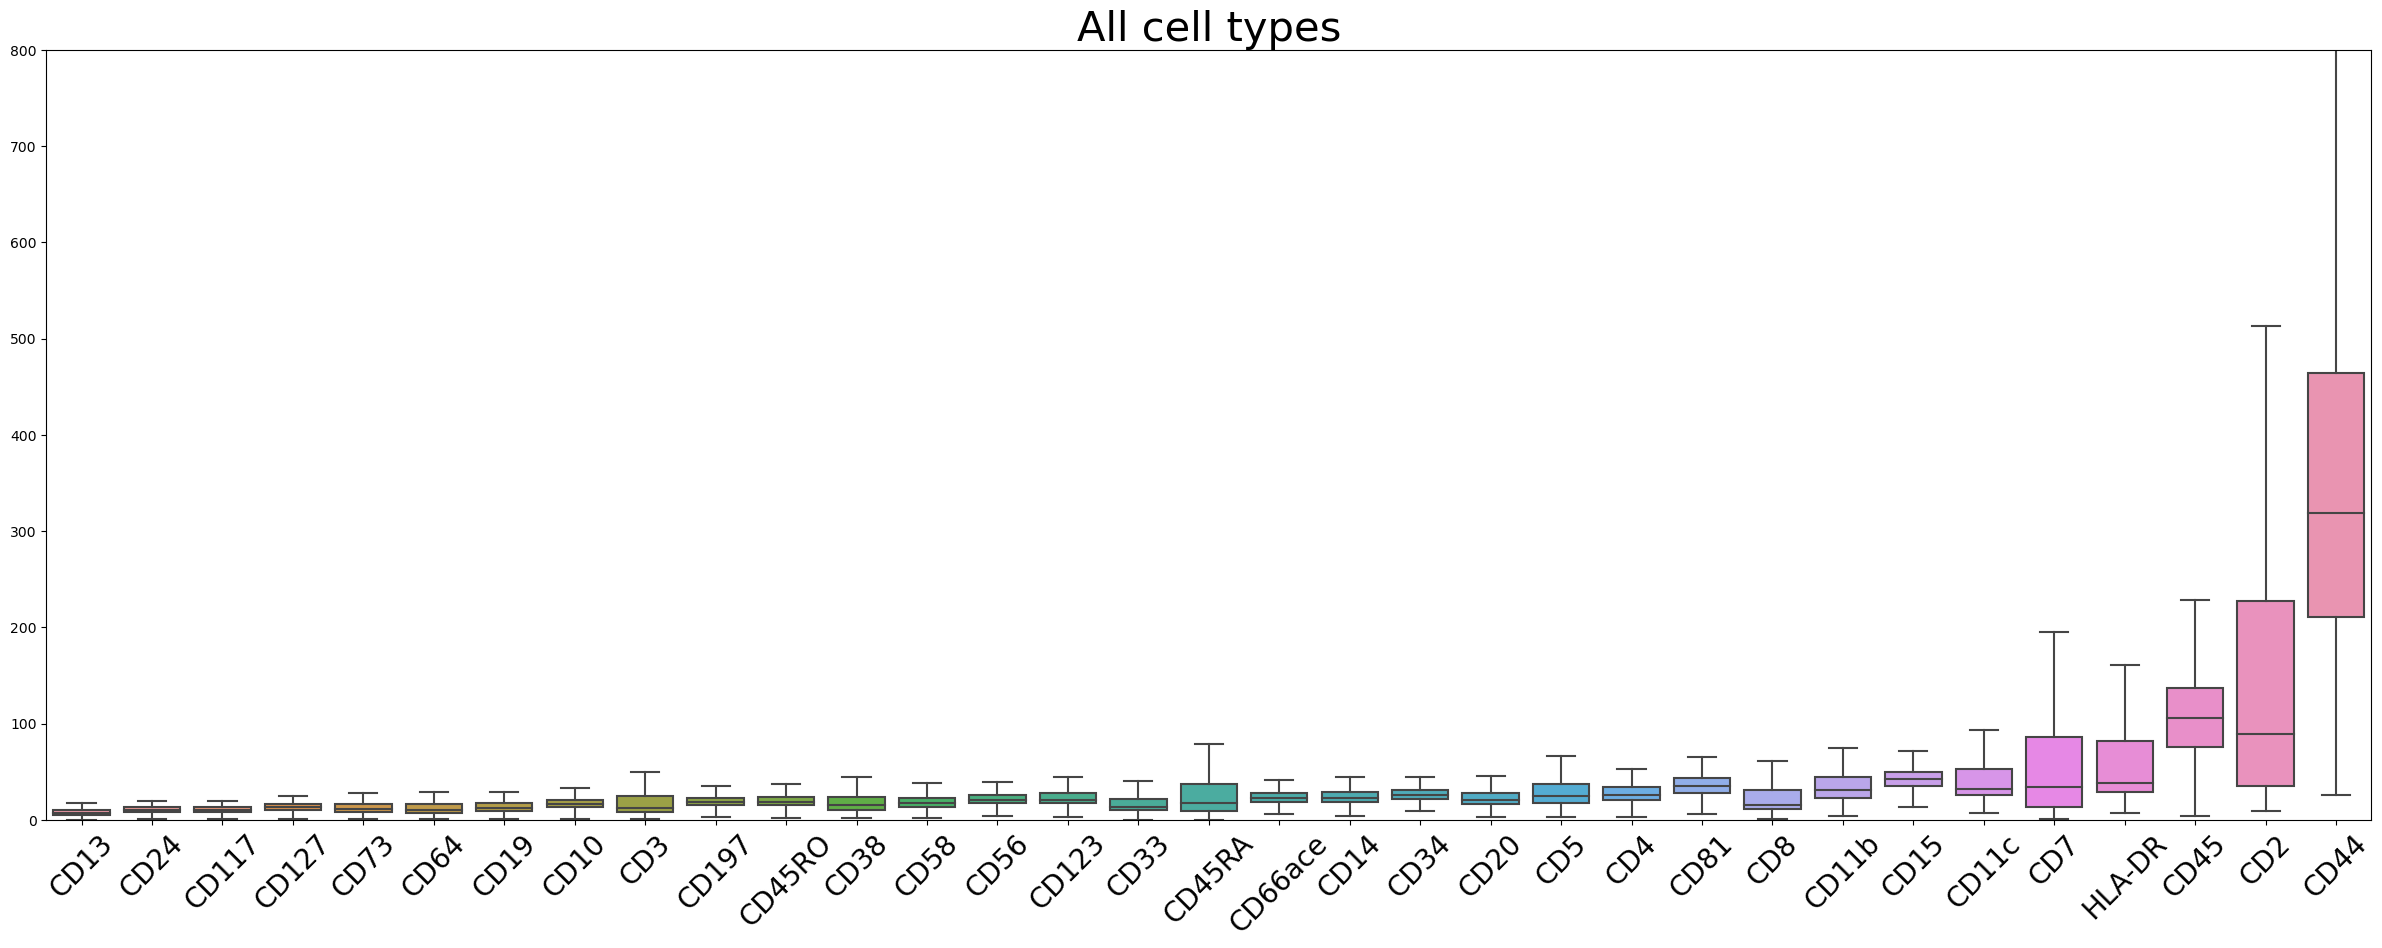

In [22]:
#All cell types

cells= len(prot)

print("In total:", cells, "cells in the sample" )

plt.figure(figsize=(30,10))
plt.ylim(0, 800)
a=sns.boxplot(data=df_sorted_all,  fliersize=0)

a.set_xticklabels(a.get_xticklabels(),rotation=45) 
a.tick_params(axis='x', labelsize=20)
plt.title("All cell types", fontsize=30)

a.set_xticklabels(a.get_xticklabels(),rotation=45) 
a.tick_params(axis='x', labelsize=20)




In total: 1226 NK- and T-cells in the sample


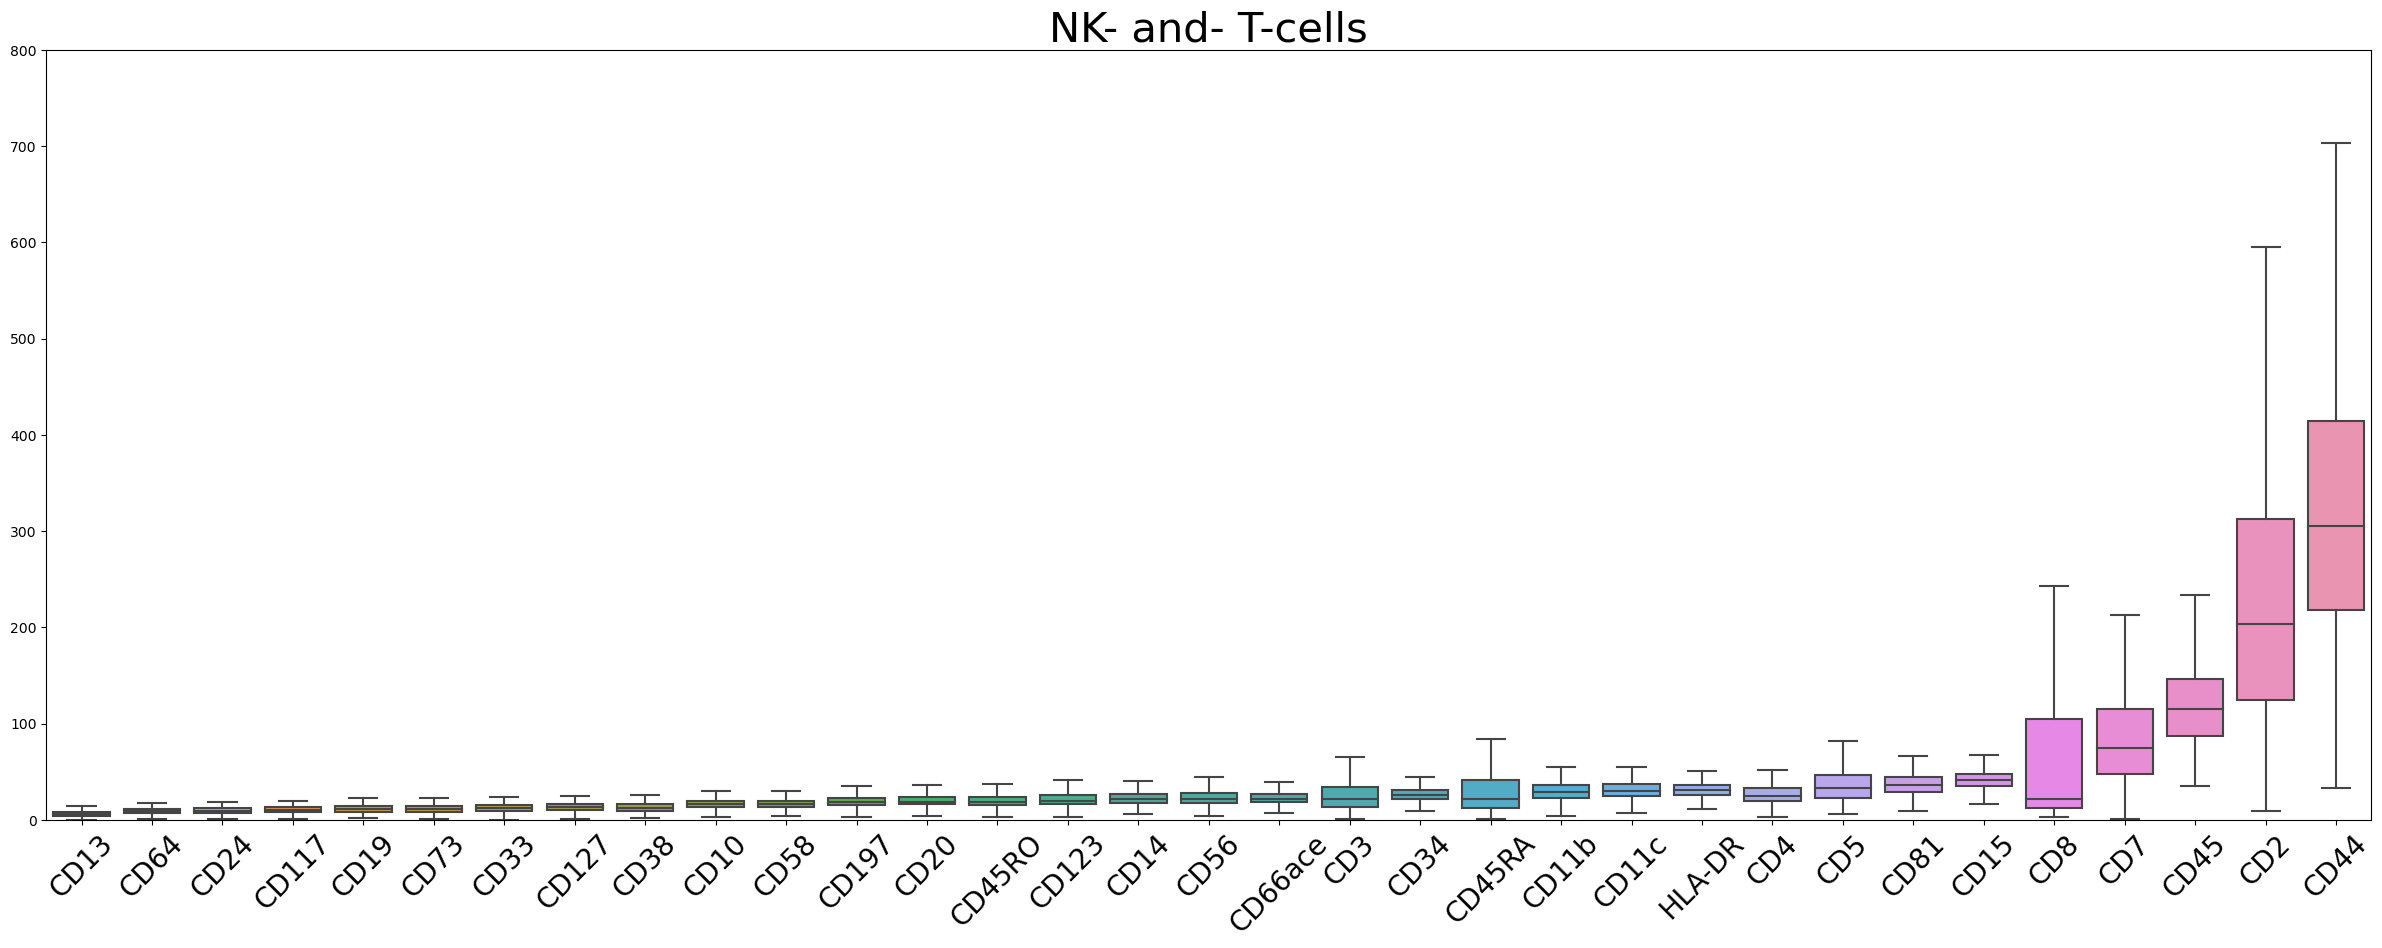

In [23]:
#NK cells

cells= len(nk_prot)

print("In total:", cells, "NK- and T-cells in the sample" )

plt.figure(figsize=(30,10))
plt.ylim(0, 800)
a=sns.boxplot(data=df_sorted_nk,  fliersize=0)

a.set_xticklabels(a.get_xticklabels(),rotation=45) 
a.tick_params(axis='x', labelsize=20)
plt.title("NK- and- T-cells", fontsize=30)

a.set_xticklabels(a.get_xticklabels(),rotation=45) 
a.tick_params(axis='x', labelsize=20)


In total: 2188 cells in the sample


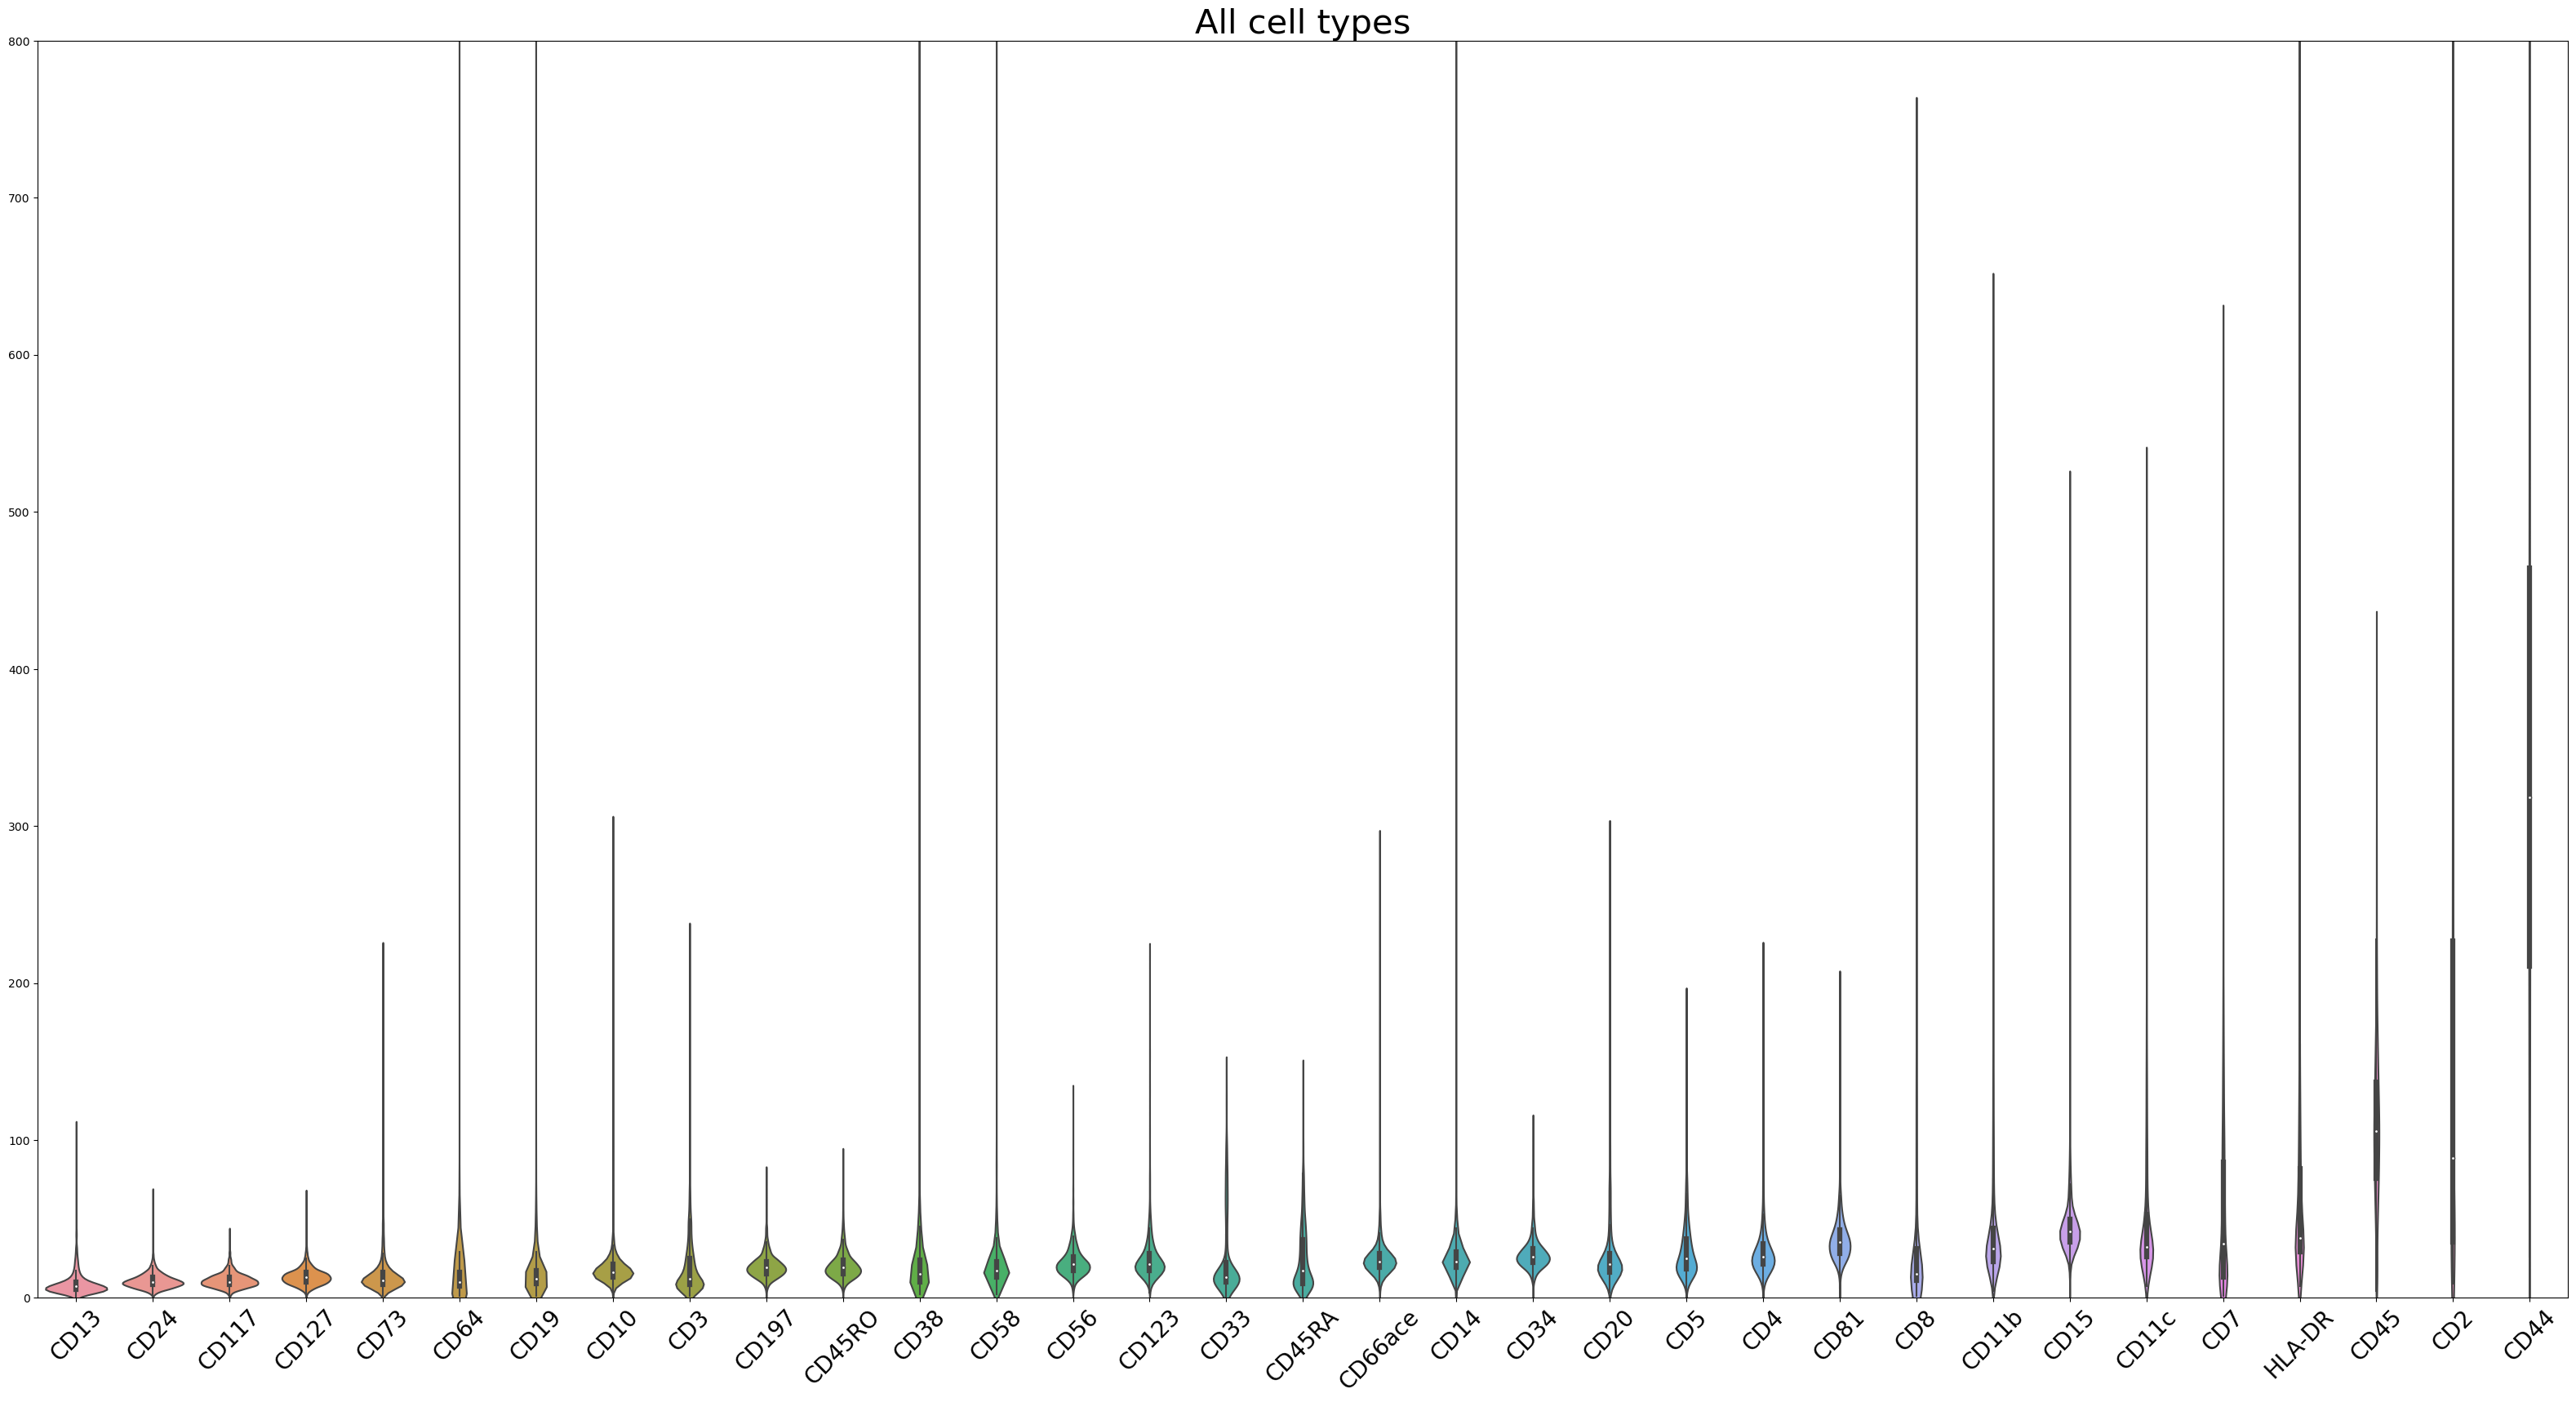

In [24]:
#All cells

cells= len(prot)

print("In total:", cells, "cells in the sample" )

plt.figure(figsize=(40,20))
plt.ylim(0, 800)
a=sns.violinplot(data=df_sorted_all,  fliersize=0)

a.set_xticklabels(a.get_xticklabels(),rotation=45) 
a.tick_params(axis='x', labelsize=20)
plt.title("All cell types", fontsize=30)

a.set_xticklabels(a.get_xticklabels(),rotation=45) 
a.tick_params(axis='x', labelsize=20)

In total: 1226 NK- and T-cells in the sample


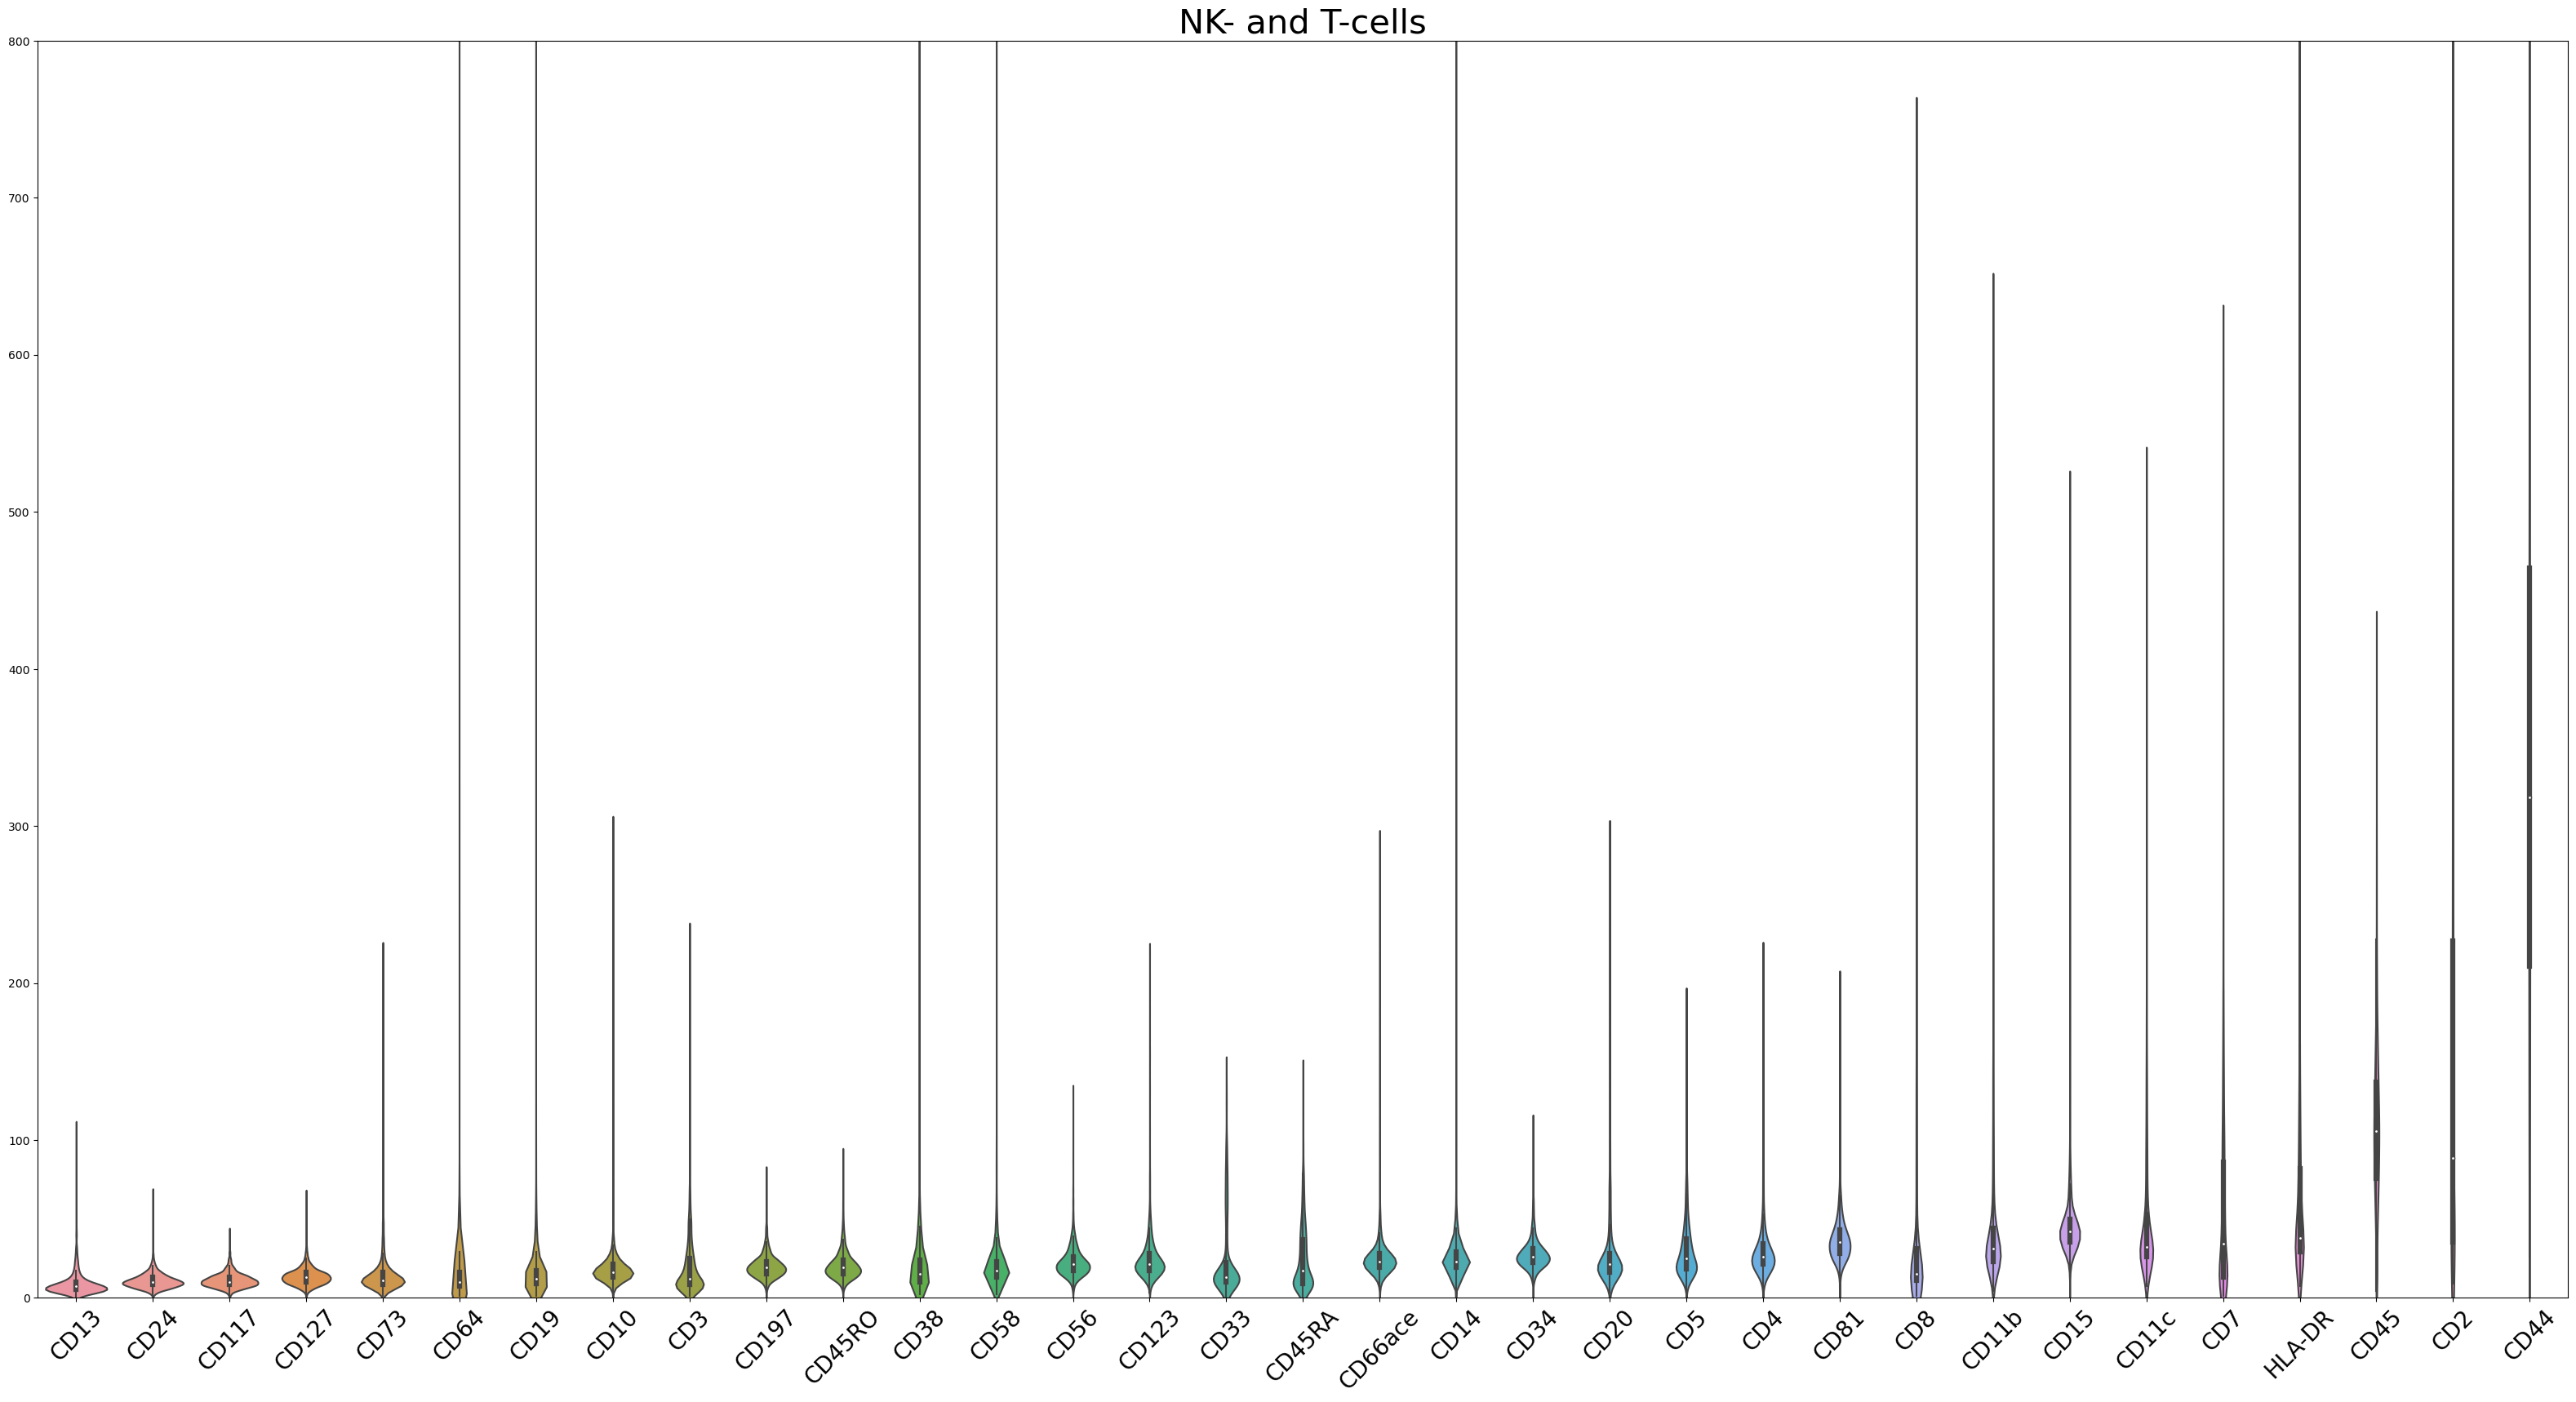

In [25]:
#NK cells

cells= len(nk_prot)

print("In total:", cells, "NK- and T-cells in the sample" )

plt.figure(figsize=(40,20))
plt.ylim(0, 800)
a=sns.violinplot(data=df_sorted_all,  fliersize=0)

a.set_xticklabels(a.get_xticklabels(),rotation=45) 
a.tick_params(axis='x', labelsize=20)
plt.title("NK- and T-cells", fontsize=30)

a.set_xticklabels(a.get_xticklabels(),rotation=45) 
a.tick_params(axis='x', labelsize=20)



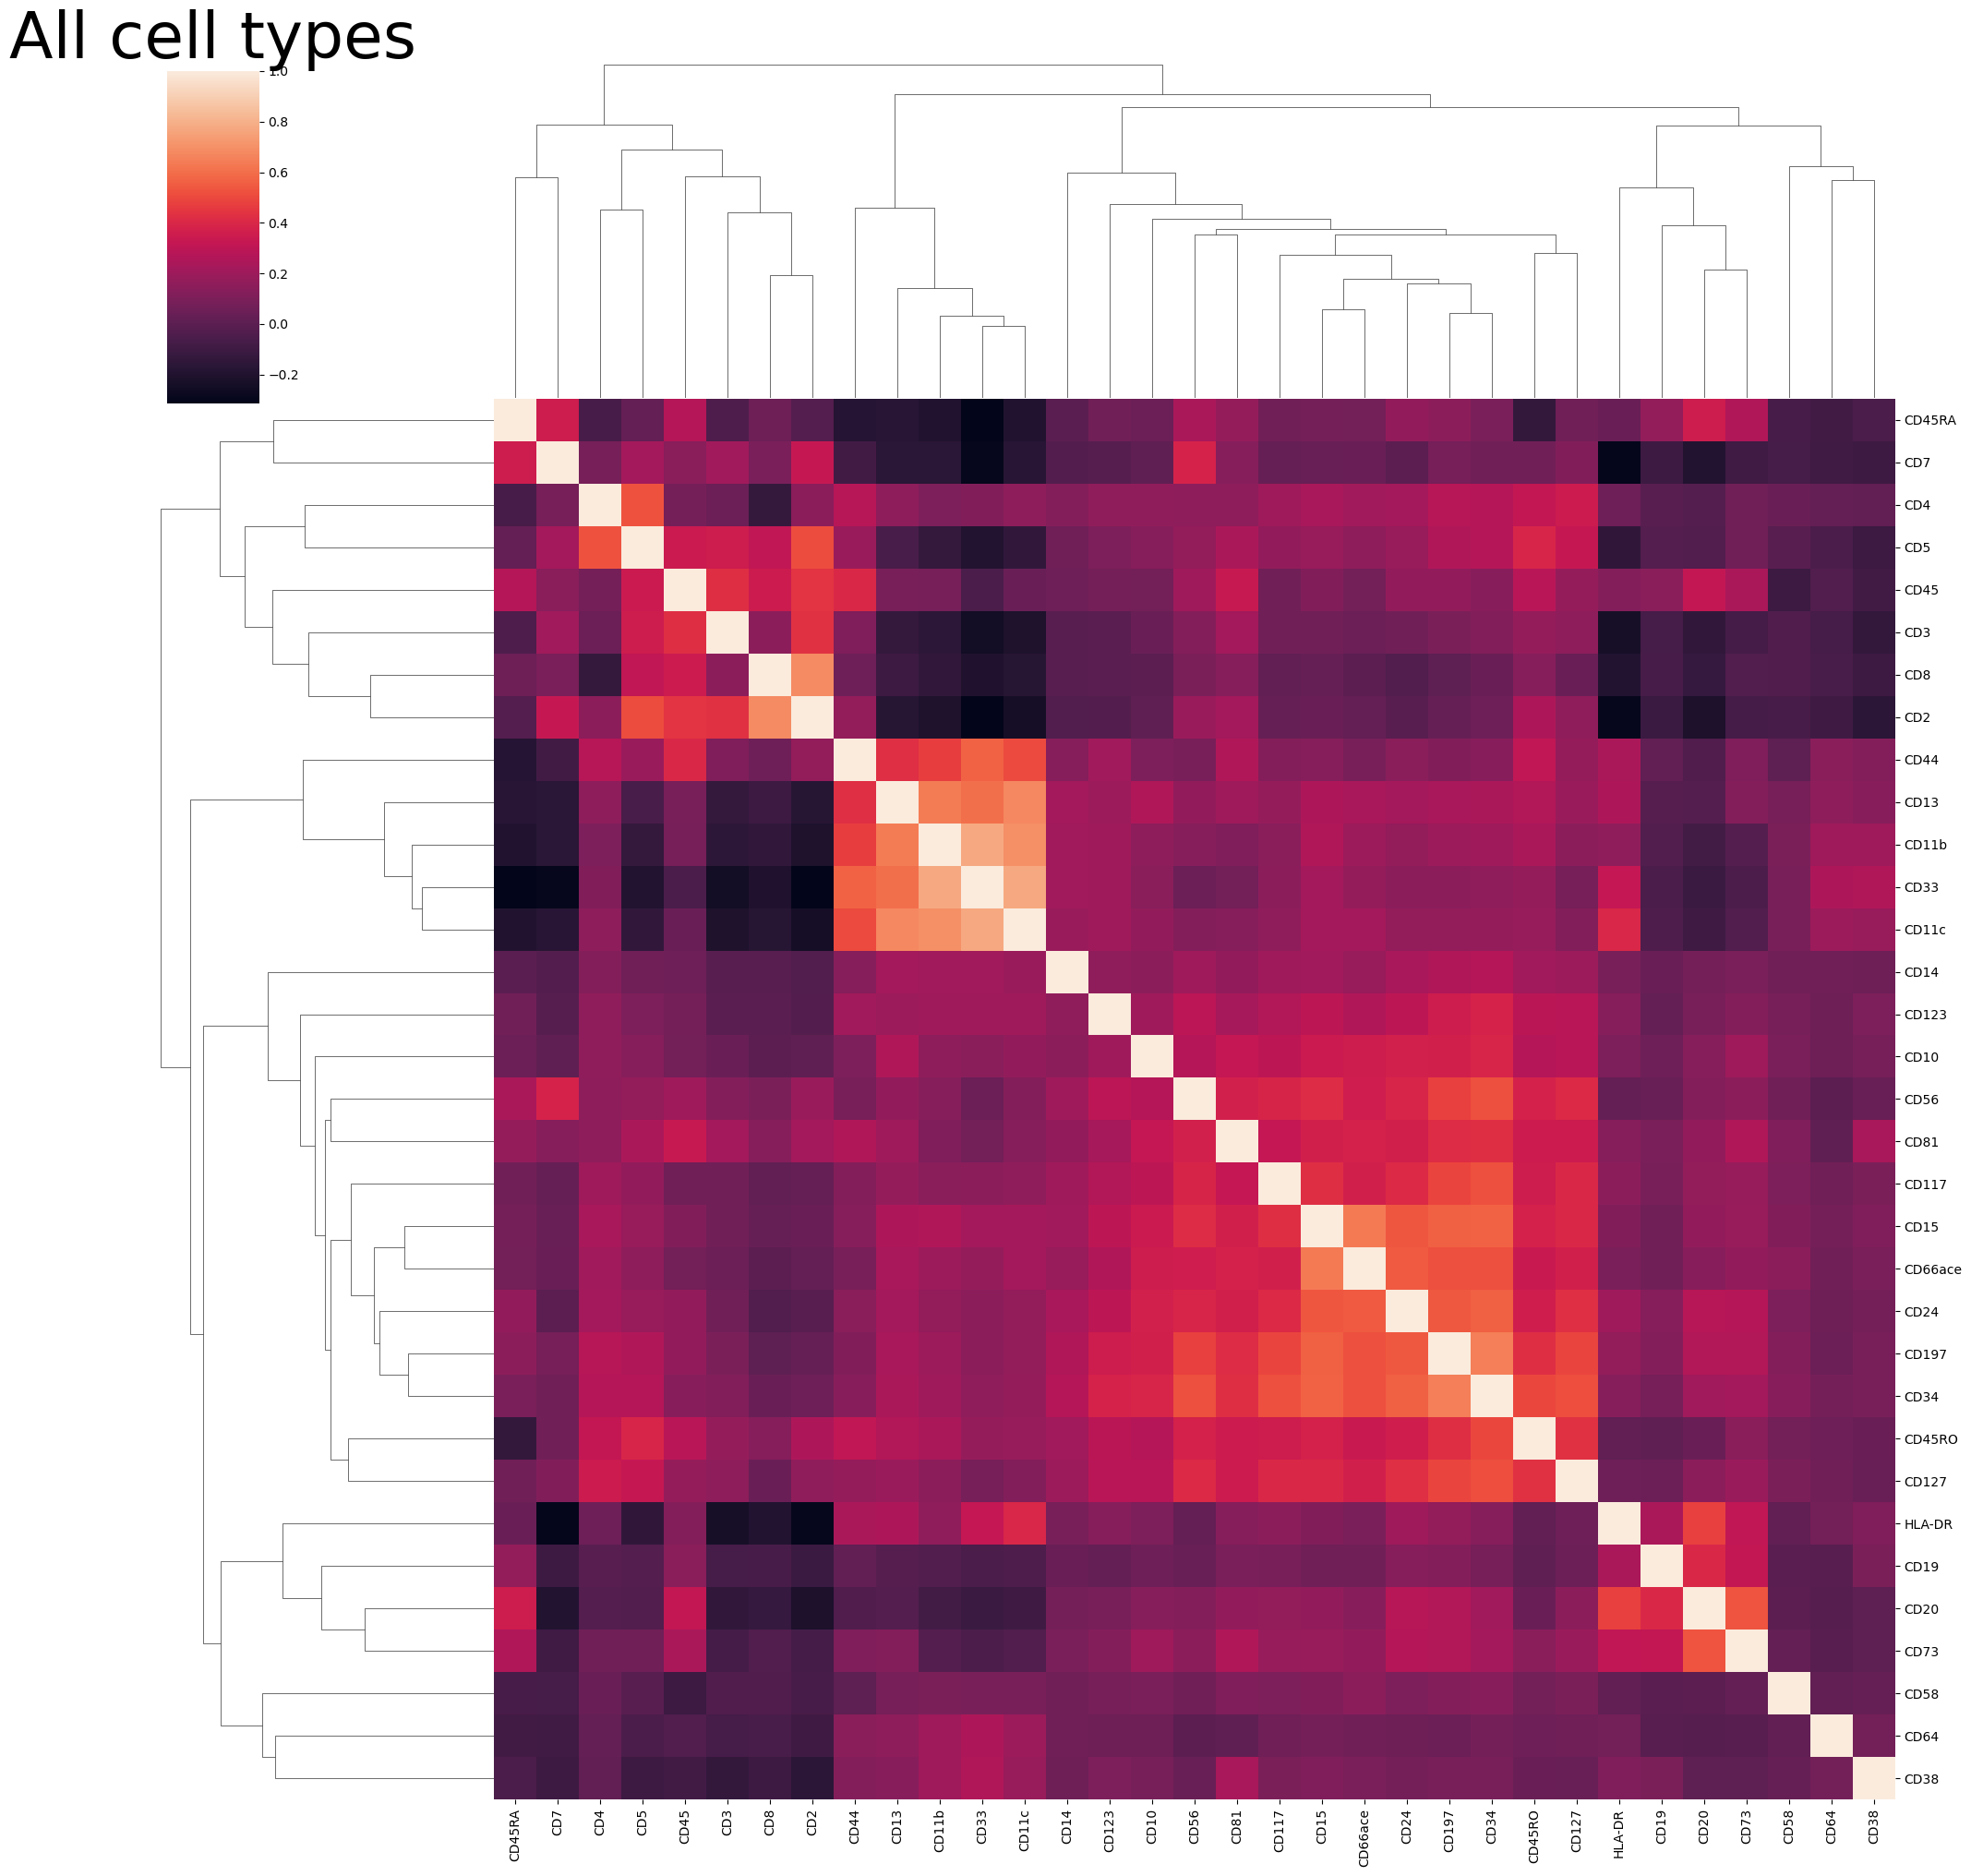

In [26]:
#All cells
matrix1=prot.corr(method='pearson', min_periods=1)
sns.clustermap(matrix1, figsize=(20,20))
plt.title('All cell types', fontsize = 50) ;



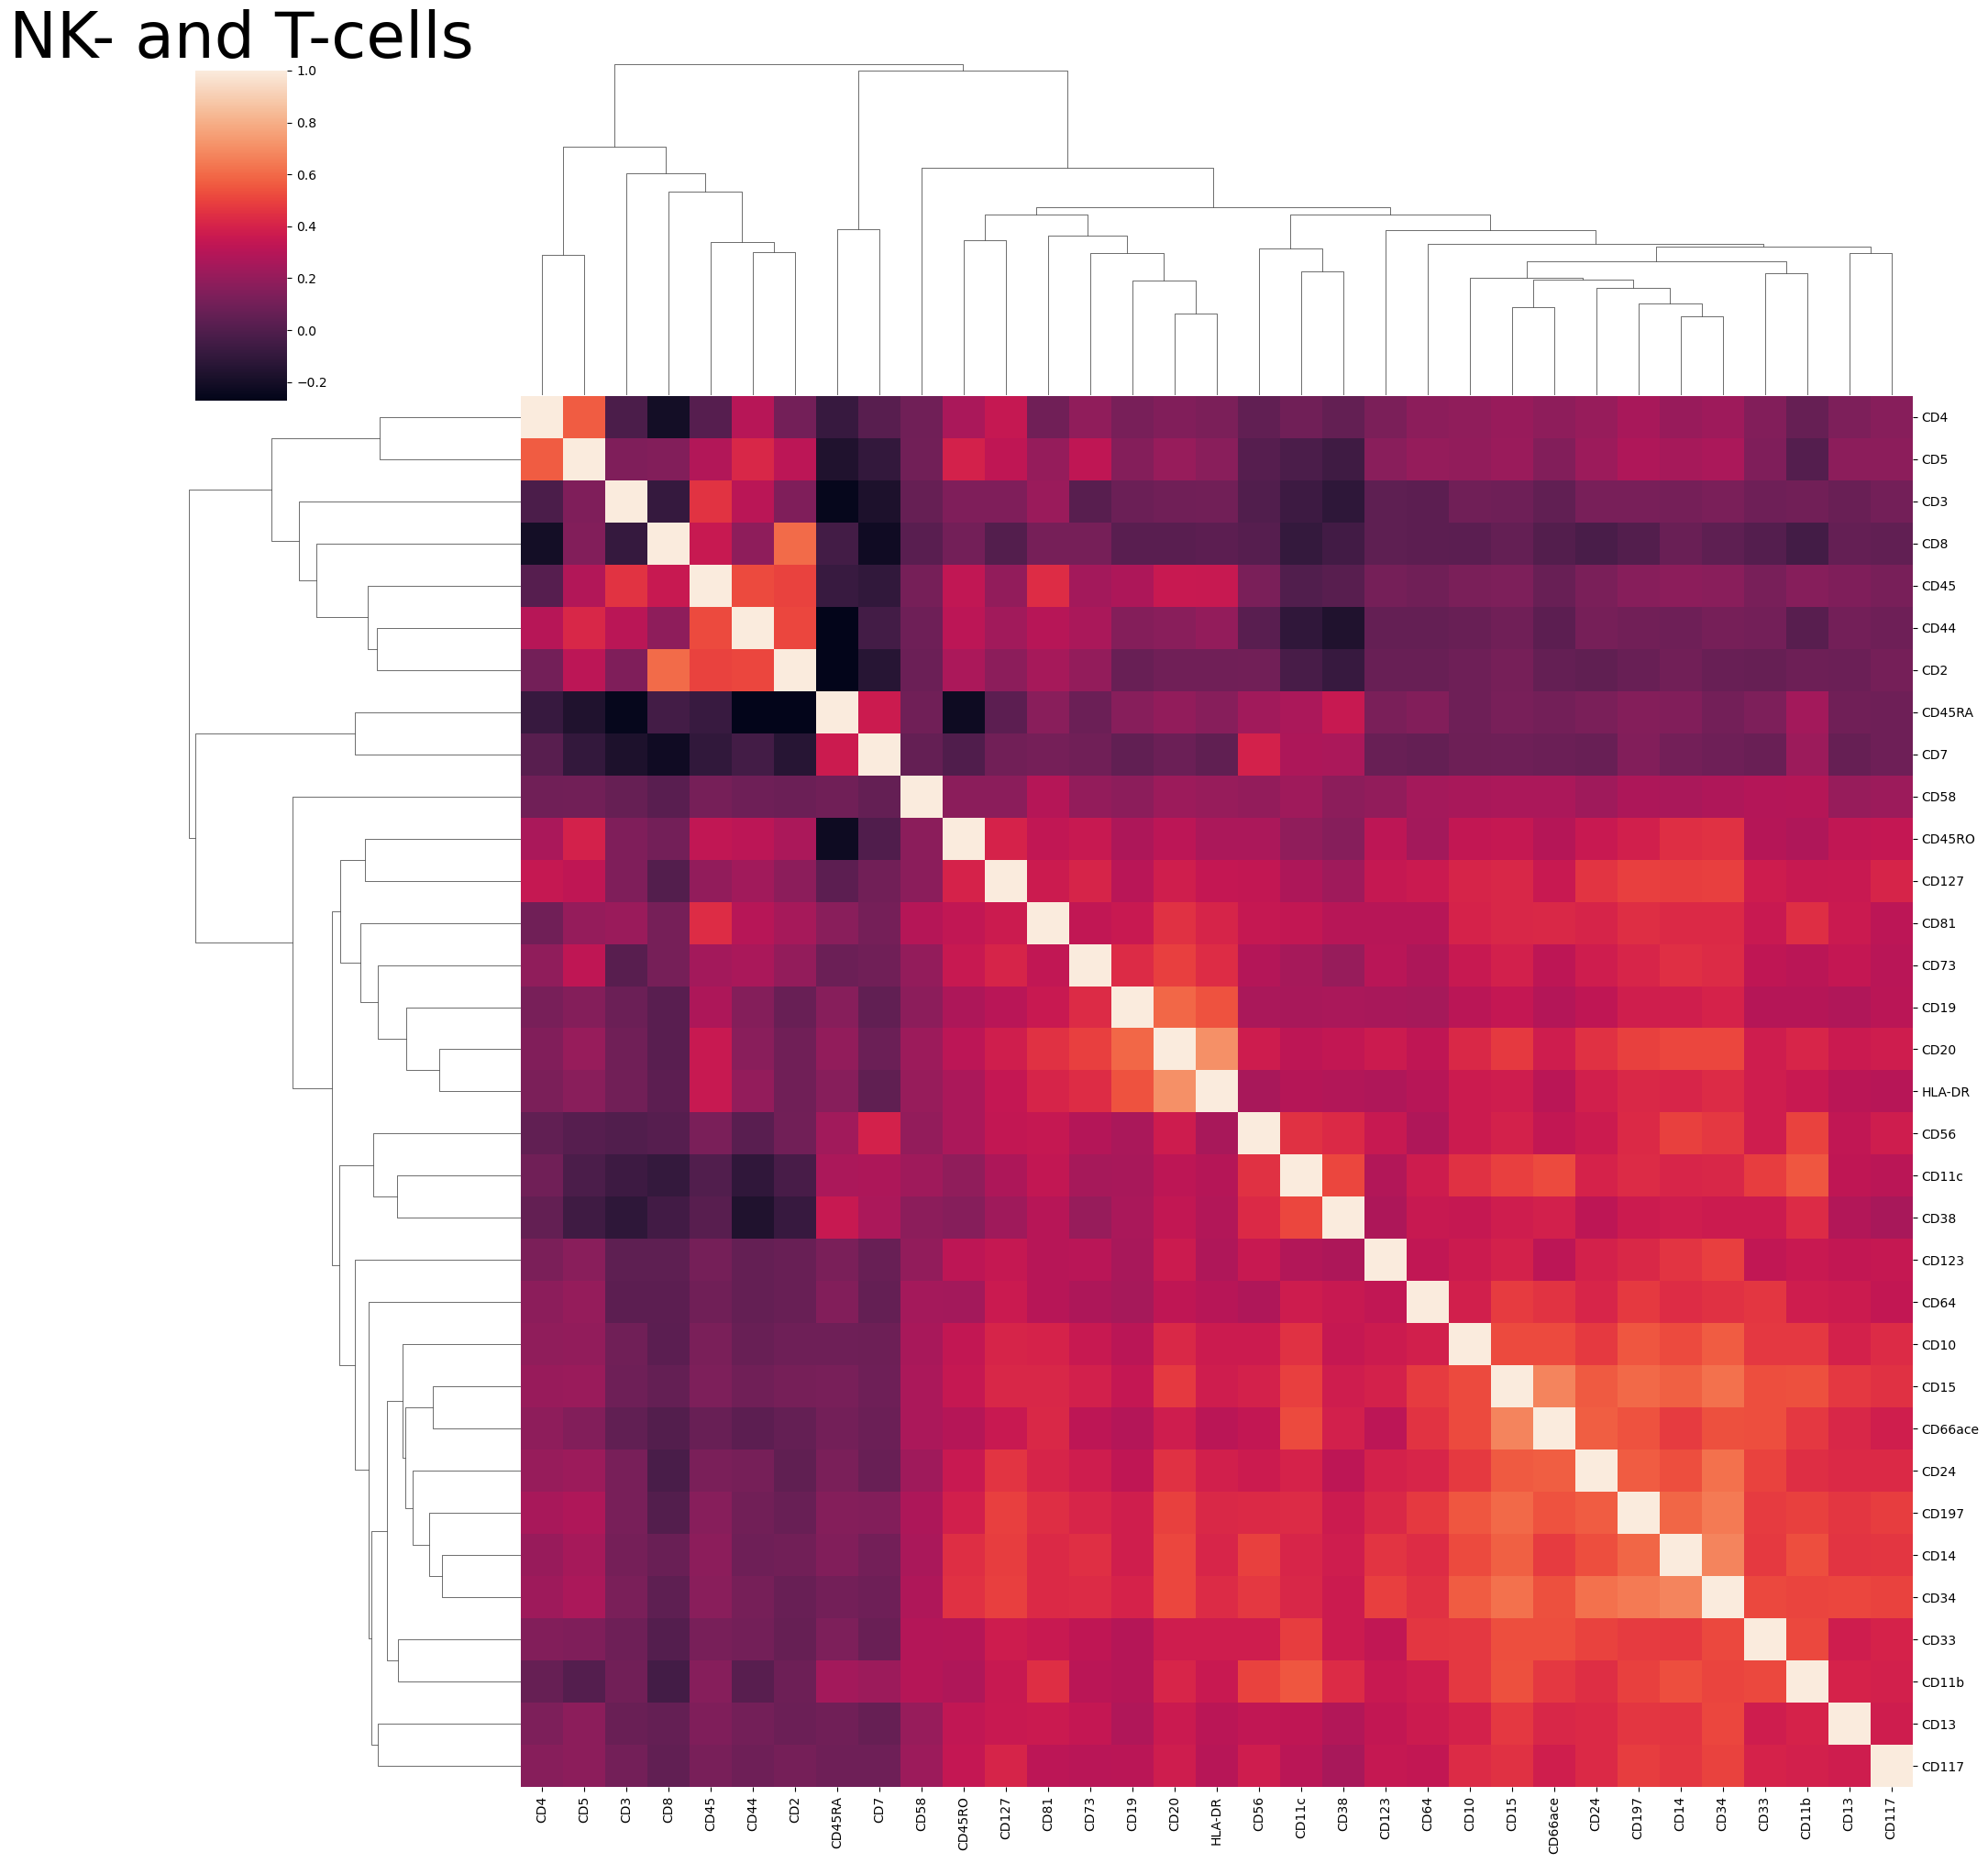

In [27]:
#NK cells
matrix3=nk_prot.corr(method='pearson', min_periods=1)
sns.clustermap(matrix3, figsize=(20,20))
plt.title('NK- and T-cells', fontsize = 50) ;


In [28]:
#Adding protein data to anndata file for UMAPs, all cell types

a = adata_sample.obs
b = prot

neurips_umap=pd.concat([a, b], axis=1)

adata_sample.obs=neurips_umap
adata_sample

AnnData object with n_obs × n_vars = 2188 × 8051
    obs: 'cell_type', 'n_genes', 'percent_mito', 'percent_ribo', 'n_counts', 'leiden_r2', 'leiden_r2_n_genes_MAD_diff', 'leiden_r2_n_counts_MAD_diff', 'leiden_r2_percent_mito_MAD_diff', 'filter', 'model_group', 'BATCH', 'POOL', 'SAMPLE_SET', 'SAMPLE_TYPE', 'SAMPLE_TISSUE', 'DIAGNOSIS', 'SUBTYPE', 'STATUS', 'eg_code', 'leiden_r1', 'new_cell_type', 'batch_group', 'CD3', 'CD8', 'CD56', 'CD19', 'CD33', 'CD11c', 'CD45RA', 'CD123', 'CD7', 'CD4', 'CD44', 'CD14', 'CD45RO', 'CD20', 'CD5', 'HLA-DR', 'CD11b', 'CD64', 'CD58', 'CD24', 'CD13', 'CD2', 'CD81', 'CD38', 'CD127', 'CD45', 'CD73', 'CD197', 'CD34', 'CD10', 'CD15', 'CD117', 'CD66ace'
    uns: 'neighbors', 'new_cell_type_colors', 'umap'
    obsm: 'X_pca', 'X_totalVI', 'X_umap', 'protein_expression'
    obsp: 'connectivities', 'distances'

In [29]:
adata_sample.obs

,cell_type,n_genes,percent_mito,percent_ribo,n_counts,leiden_r2,leiden_r2_n_genes_MAD_diff,leiden_r2_n_counts_MAD_diff,leiden_r2_percent_mito_MAD_diff,filter,...,CD38,CD127,CD45,CD73,CD197,CD34,CD10,CD15,CD117,CD66ace
AAACCTGAGCCCTAAT-1-100,NKT,1104,0.072933,0.140216,1947.0,NaN,NaN,NaN,NaN,False,...,10,14,50,8,17,25,17,43,11,25
AAACCTGCAAGCCGCT-1-100,non-leukemic,2954,0.000086,0.362812,11579.0,NaN,NaN,NaN,NaN,False,...,42,16,27,10,28,37,33,107,17,102
AAACCTGCACTGTCGG-1-100,non-leukemic,1767,0.005680,0.165269,3697.0,NaN,NaN,NaN,NaN,False,...,38,17,104,11,18,27,21,38,8,23
AAACCTGCAGACGCTC-1-100,NKT,1928,0.035144,0.433632,7142.0,NaN,NaN,NaN,NaN,False,...,16,7,126,18,28,34,12,51,14,21
AAACCTGTCCTTAATC-1-100,NKT,1750,0.029976,0.421151,5371.0,NaN,NaN,NaN,NaN,False,...,9,12,66,10,20,27,16,30,10,17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TTTGGTTCACGCATCG-1-100,NKT,2347,0.037616,0.232698,6141.0,NaN,NaN,NaN,NaN,False,...,18,9,61,16,25,35,33,48,4,25
TTTGGTTGTATAATGG-1-100,non-leukemic,3605,0.053122,0.195860,12029.0,NaN,NaN,NaN,NaN,False,...,8,9,30,7,15,19,9,20,6,16
TTTGGTTTCCGAAGAG-1-100,NKT,2857,0.058289,0.283304,8475.0,NaN,NaN,NaN,NaN,False,...,17,17,273,15,20,38,17,46,6,19
TTTGTCAAGAATTGTG-1-100,NKT,1718,0.039038,0.256813,4073.0,NaN,NaN,NaN,NaN,False,...,8,12,106,6,15,18,19,48,16,15


In [30]:
#Adding protein data to anndata file for UMAPs, all cell types

a = adata_nk.obs
b = nk_prot

adata_nk_umap=pd.concat([a, b], axis=1)

adata_nk.obs=adata_nk_umap

adata_nk

AnnData object with n_obs × n_vars = 1226 × 8051
    obs: 'cell_type', 'n_genes', 'percent_mito', 'percent_ribo', 'n_counts', 'leiden_r2', 'leiden_r2_n_genes_MAD_diff', 'leiden_r2_n_counts_MAD_diff', 'leiden_r2_percent_mito_MAD_diff', 'filter', 'model_group', 'BATCH', 'POOL', 'SAMPLE_SET', 'SAMPLE_TYPE', 'SAMPLE_TISSUE', 'DIAGNOSIS', 'SUBTYPE', 'STATUS', 'eg_code', 'leiden_r1', 'new_cell_type', 'batch_group', 'CD3', 'CD8', 'CD56', 'CD19', 'CD33', 'CD11c', 'CD45RA', 'CD123', 'CD7', 'CD4', 'CD44', 'CD14', 'CD45RO', 'CD20', 'CD5', 'HLA-DR', 'CD11b', 'CD64', 'CD58', 'CD24', 'CD13', 'CD2', 'CD81', 'CD38', 'CD127', 'CD45', 'CD73', 'CD197', 'CD34', 'CD10', 'CD15', 'CD117', 'CD66ace'
    uns: 'neighbors', 'new_cell_type_colors', 'umap'
    obsm: 'X_pca', 'X_totalVI', 'X_umap', 'protein_expression'
    obsp: 'connectivities', 'distances'

In [31]:
adata_nk.obs["CD56"]

AAACCTGAGCCCTAAT-1-100    20
AAACCTGCAGACGCTC-1-100    21
AAACCTGTCCTTAATC-1-100    28
AAACGGGGTCTCTCGT-1-100    14
AAAGATGTCCAGTAGT-1-100    23
                          ..
TTTGCGCTCATGTAGC-1-100    10
TTTGGTTCACGCATCG-1-100    41
TTTGGTTTCCGAAGAG-1-100    13
TTTGTCAAGAATTGTG-1-100    19
TTTGTCACATTCACTT-1-100    27
Name: CD56, Length: 1226, dtype: int64

In [32]:
#NK-cell markers

markers=["CD56"]

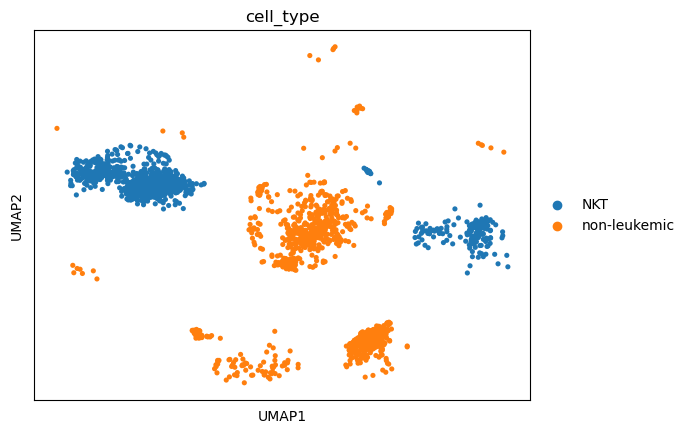

In [33]:
#All cell types
sc.pl.umap(adata_sample, color= "cell_type", color_map= 'viridis')

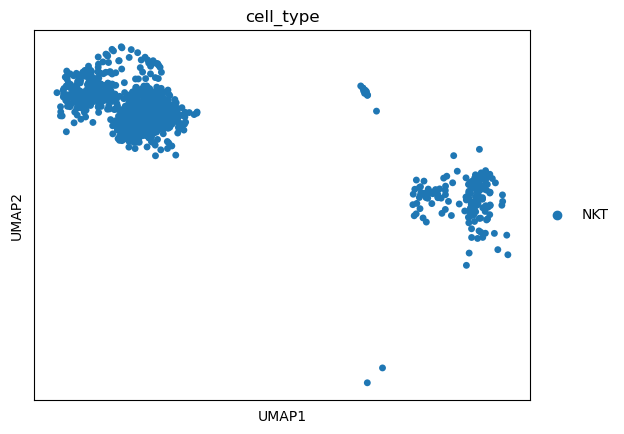

In [34]:
#NK- and T-cells

sc.pl.umap(adata_nk, color = "cell_type", color_map = 'viridis')

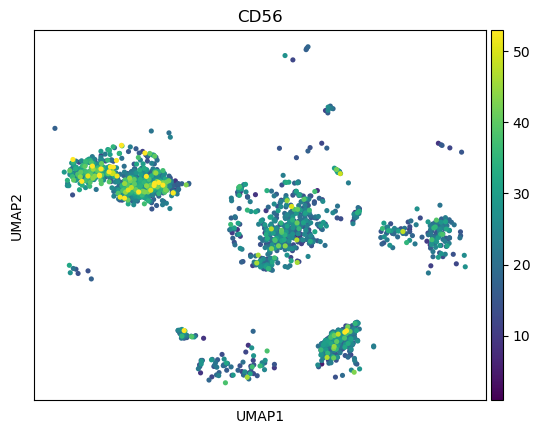

In [33]:
#All cell types

sc.pl.umap(adata_sample, color= markers, vmax="p99",  color_map= 'viridis')

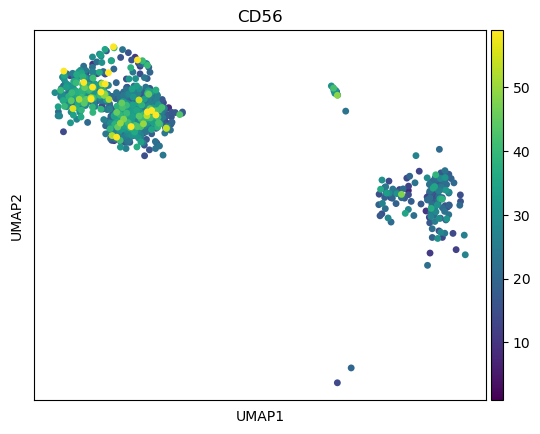

In [34]:
#NK- and T-cells

sc.pl.umap(adata_nk, color = markers,vmax="p99", color_map = 'viridis')

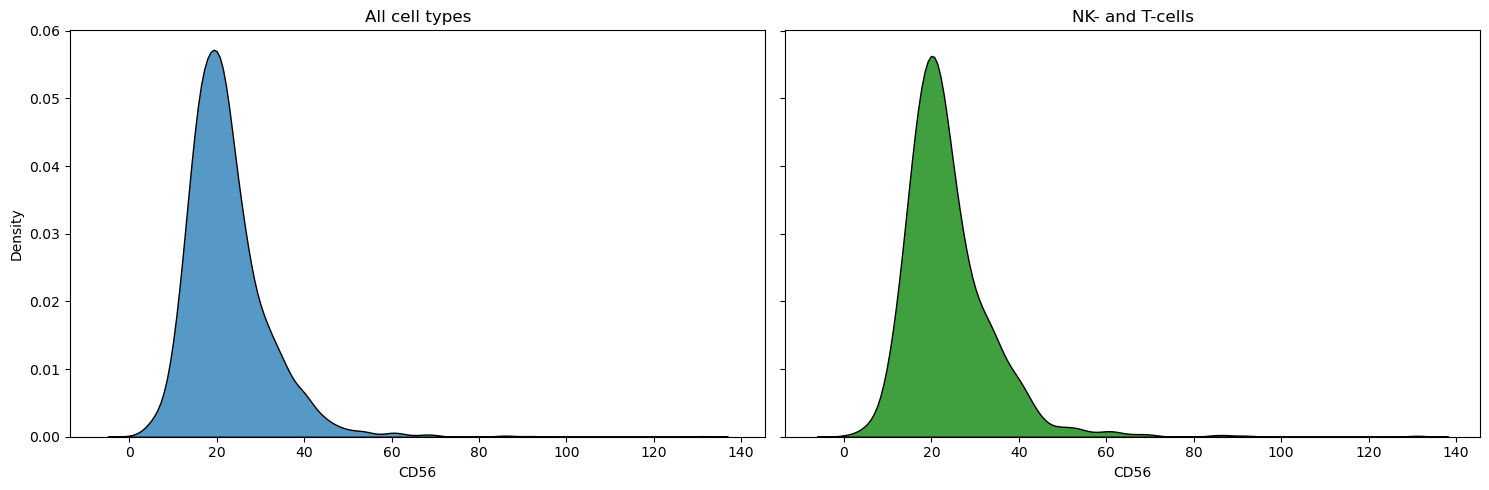

In [35]:
#NK and T-cells

for column_name in markers:
    fig, ax =plt.subplots(1,2 ,tight_layout=True, figsize=(15, 5), sharex=True, sharey=True)
    fig.show()

    ax1 = sns.kdeplot(data=prot, x=column_name, multiple="stack", ax=ax[0]) ;
    ax2 = sns.kdeplot(data=nk_prot, x=column_name, color = "g", multiple="stack", ax=ax[1]) ;


    ax1.title.set_text('All cell types')    
    ax2.title.set_text('NK- and T-cells')
    
    plt.show()

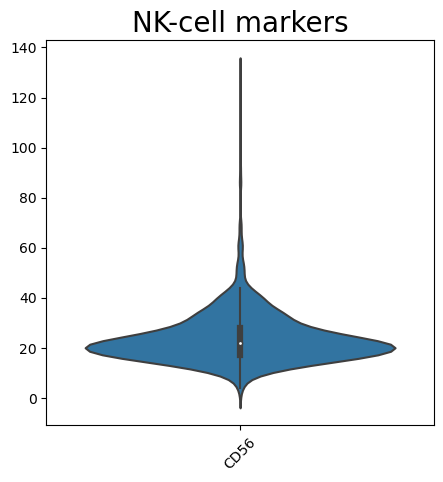

In [36]:
#NK markers

plt.figure(figsize=(5,5))
a=sns.violinplot(data=nk_prot[markers],  fliersize=0)

a.set_xticklabels(a.get_xticklabels(),rotation=45) 
a.tick_params(axis='x', labelsize=10)
plt.title("NK-cell markers", fontsize=20)

a.set_xticklabels(a.get_xticklabels(),rotation=45) 
a.tick_params(axis='x', labelsize=10)